In [80]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
from tqdm import tqdm

DATADIR = r"C:\Users\acer\Downloads\w1867202\SDGP\Dataset"
CATEGORIES = ['Chickenpox','Mild','Monkeypox','Normal','Severe']

for category in CATEGORIES:
    path = os.path.join(DATADIR, category)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path,img))
#         plt.imshow(img_array)
#         plt.show()
#         break
#     break
                

In [81]:
#  print(img_array)

In [82]:
# print(img_array.shape)

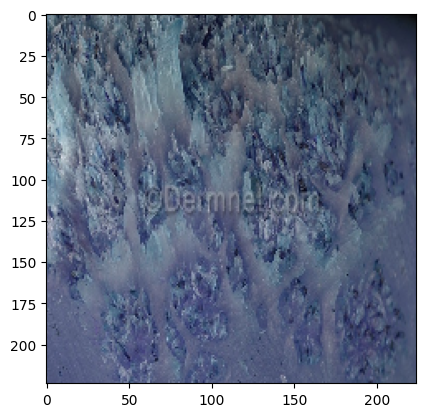

In [83]:
IMG_SIZE=224

new_array = cv2.resize(img_array,(IMG_SIZE,IMG_SIZE))
plt.imshow(new_array)
plt.show()

In [84]:
training_data = []

def create_training_data():
    
    for category in CATEGORIES:
        path = os.path.join(DATADIR, category)
        class_num = CATEGORIES.index(category)

        for img in tqdm(os.listdir(path)): # allows generate of progress bars
            try:
                img_array = cv2.imread(os.path.join(path,img))
                new_array = cv2.resize(img_array,(IMG_SIZE,IMG_SIZE))
                training_data.append([new_array,class_num])
            except Exception as e:
                pass
        
create_training_data()
      

100%|██████████| 319/319 [00:02<00:00, 128.22it/s]


In [85]:
print(len(training_data))

1328


In [86]:
# shuffle training data
import random

random.shuffle(training_data)
# print(training_data)

In [87]:
# #check shuffle
# for x in training_data[:10]:
#     print(x[1])


In [88]:
#VGG16 model 
import keras,os
from keras.models import Sequential
from keras.layers import Input,Dense, Conv2D, MaxPool2D , Flatten
from keras.preprocessing.image import ImageDataGenerator

from tensorflow.keras.layers import Input,Flatten,Dense
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.models import Sequential
from glob import glob

In [89]:
trdata = ImageDataGenerator()
# traindata = training_data
traindata = trdata.flow_from_directory(directory="Dataset",target_size=(224,224))
tsdata = ImageDataGenerator()
testdata = tsdata.flow_from_directory(directory="test", target_size=(224,224))

Found 1328 images belonging to 5 classes.
Found 32 images belonging to 5 classes.


In [90]:
IMAGE_SIZE=[224,224]
vgg=VGG16(input_shape=IMAGE_SIZE+[3],weights='imagenet',include_top=False)

In [91]:
folders=glob(r"C:\Users\acer\Downloads\w1867202\SDGP\Dataset\*")
print(len(folders))

5


In [92]:
x=Flatten()(vgg.output)
prediction=Dense(len(folders),activation='softmax')(x)
model=Model(inputs=vgg.input,outputs=prediction)
model.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0   

In [93]:
for layer in vgg.layers:
    layer.trainable=False
